(1600, 1200, 3)


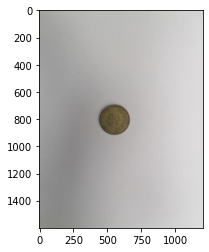

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import cv2


im =  cv2.imread('index.jpg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


plt.imshow(im) # as RGB Format
plt.show()



(1920000, 3)
[[212.72737749 211.10603738 211.66650103]
 [163.67718493 162.78539784 162.41903603]
 [189.65002355 187.45036751 186.45103255]
 [ 95.18470231  83.49342941  56.88359555]
 [143.33671313 142.45804529 142.10970102]]


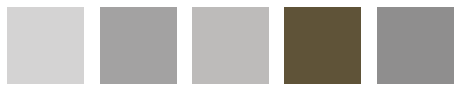

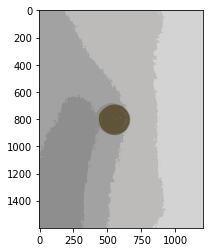

In [ ]:
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)


from sklearn.cluster import KMeans
dominant_colors = 5

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

centers = km.cluster_centers_
print(centers) # In RGB Format

centers = np.array(centers,dtype='uint8')


i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


new_img = np.zeros((1600*1200,3),dtype='uint8')


for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

In [ ]:


print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()